#Linear vs Polynomial Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

x=np.array([2,4,6,8,10]).reshape(-1,1)
y=np.array([6,12,20,42,120])

###Linear Regression

In [2]:
linear_model=LinearRegression()
linear_model.fit(x,y)
y_pred=linear_model.predict(x)

###Polynomial Regression

In [3]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x)
poly_model=LinearRegression()
poly_model.fit(x_poly,y)
y_poly_pred=poly_model.predict(x_poly)

###Plot

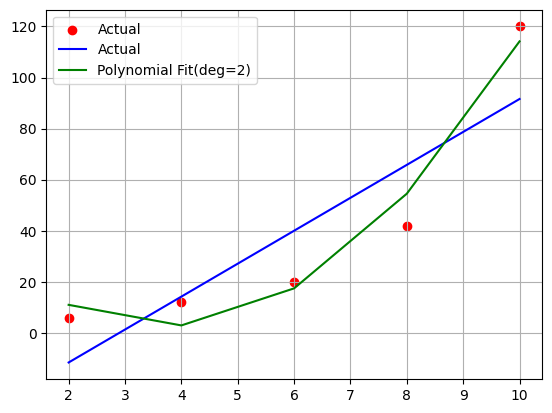

In [4]:
plt.scatter(x,y,color='red',label='Actual')
plt.plot(x,y_pred,color='blue',label='Actual')
plt.plot(x,y_poly_pred,label='Polynomial Fit(deg=2)',color='green')
plt.legend()
plt.grid()
plt.show()

#Example:Salary Prediction

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
df=pd.read_csv("https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Salary_Data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6701 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 104.9 KB


In [11]:
df.isnull().sum()

,0
Years of Experience,3
Salary,5


###Drop

In [12]:
df.dropna(inplace=True)
df.isnull().sum()

,0
Years of Experience,0
Salary,0


###Train and Test

In [15]:
x=df[["Years of Experience"]]
y=df["Salary"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

##Linear Regression

###Train

In [16]:
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)
y_pred_lin=linear_model.predict(x_test)

###Metrics

In [17]:
mse_lin=mean_squared_error(y_test,y_pred_lin)
rmse_lin=np.sqrt(mse_lin)
r2_lin=r2_score(y_test,y_pred_lin)
print("MSE:",mse_lin)
print("RMSE:",rmse_lin)
print("R2:",r2_lin)

MSE: 946833177.7094355
RMSE: 30770.654489455297
R2: 0.6669549610495003


##Polynomial Regression

###Degree2

In [19]:
poly_2 = PolynomialFeatures(degree=2)
x_train_poly2=poly_2.fit_transform(x_train)

x_test_poly2=poly_2.transform(x_test)

poly_model2=LinearRegression()
poly_model2.fit(x_train_poly2,y_train)
y_pred_poly2=poly_model2.predict(x_test_poly2)

###Metrics

In [20]:
mse_poly2=mean_squared_error(y_test,y_pred_poly2)
rmse_poly2=np.sqrt(mse_poly2)
r2_poly2=r2_score(y_test,y_pred_poly2)

###degree4

In [21]:
poly4=PolynomialFeatures(degree=4)
x_train_poly4=poly4.fit_transform(x_train)
x_test_poly4=poly4.transform(x_test)

poly_model4=LinearRegression()
poly_model4.fit(x_train_poly4,y_train)
y_pred_poly4=poly_model4.predict(x_test_poly4)

###Metrics

In [22]:
mse_poly4=mean_squared_error(y_test,y_pred_poly4)
rmse_poly4=np.sqrt(mse_poly4)
r2_poly4=r2_score(y_test,y_pred_poly4)

print("MSE:",mse_poly4)
print("RMSE:",rmse_poly4)
print("R2:",r2_poly4)

print("MSE:",mse_poly2)
print("RMSE:",rmse_poly2)
print("R2:",r2_poly2)

MSE: 720033651.6859531
RMSE: 26833.44278481524
R2: 0.7467308484568018
MSE: 726857249.7211918
RMSE: 26960.290238074067
R2: 0.7443306732971963
